# Exploration: inspecting data
This notebook collects and displays information related to the input image sets (`train`, `test`, `validate`).

In [34]:
# imports
import collections
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [28]:
# set up DataLoader to load training images with the only transformation being conversion to a tensor
data_dir = "/mnt/c/Large Files/flower_data/train"
transform = transforms.Compose([transforms.ToTensor()])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

print(f"num images: {len(dataloader)}")

num images: 6552


In [29]:
# Load image information into dataframes
data = []
for image_num, (image, label) in enumerate(dataloader):
    # expected image.shape: (1, num_channels=3, height, width)
    num_channels = image.shape[1]
    height, width = tuple(image.shape[2:])
    area = height * width
    aspect_ratio = width / height

    row = [num_channels, height, width, area, aspect_ratio]

    # add pixel summary stats from each channel to row
    for channel_num in range(3):
        if channel_num > num_channels - 1:
            min_pixel_val = None
            mean_pixel_val = None
            median_pixel_val = None
            max_pixel_val = None
        else:
            min_pixel_val = image[0,channel_num].min().item()
            mean_pixel_val = image[0,channel_num].mean().item()
            median_pixel_val = image[0,channel_num].median().item()
            max_pixel_val = image[0,channel_num].max().item()
        row.extend([min_pixel_val, mean_pixel_val, median_pixel_val, max_pixel_val])

    data.append(row)

    if (image_num + 1) % 1000 == 0 or (image_num + 1) == len(dataloader):
        print(f"processed {image_num + 1} / {len(dataloader)} images")

# build dataframe
columns = ["num_channels", "height", "width", "area", "aspect_ratio"]
for channel_num in range(3):
    columns.extend([f"chan_{channel_num}_min_pixel_val", f"chan_{channel_num}_mean_pixel_val", 
                    f"chan_{channel_num}_median_pixel_val", f"chan_{channel_num}_max_pixel_val"])

df = pd.DataFrame(data, columns=columns)

processed 1000 / 6552 images
processed 2000 / 6552 images
processed 3000 / 6552 images
processed 4000 / 6552 images
processed 5000 / 6552 images
processed 6000 / 6552 images
processed 6552 / 6552 images


In [30]:
# display stats on columns
display(df.describe())

,num_channels,height,width,area,aspect_ratio,chan_0_min_pixel_val,chan_0_mean_pixel_val,chan_0_median_pixel_val,chan_0_max_pixel_val,chan_1_min_pixel_val,chan_1_mean_pixel_val,chan_1_median_pixel_val,chan_1_max_pixel_val,chan_2_min_pixel_val,chan_2_mean_pixel_val,chan_2_median_pixel_val,chan_2_max_pixel_val
count,6552.0,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000
mean,3.0,534.322039,630.378358,332357.138584,1.210861,0.012237,0.435311,0.381145,0.987776,0.006597,0.377333,0.344421,0.957502,0.000806,0.287118,0.227765,0.926262
std,0.0,75.299123,95.926038,38521.033466,0.270849,0.029633,0.119197,0.185260,0.037962,0.022409,0.109212,0.142207,0.074279,0.007717,0.135850,0.160464,0.126192
min,3.0,500.000000,500.000000,250000.000000,0.428082,0.000000,0.029493,0.000000,0.533333,0.000000,0.035696,0.000000,0.407843,0.000000,0.013885,0.000000,0.235294
25%,3.0,500.000000,501.000000,312500.000000,1.000000,0.000000,0.352689,0.247059,1.000000,0.000000,0.311543,0.250980,0.937255,0.000000,0.182219,0.101961,0.894118
50%,3.0,500.000000,667.000000,333500.000000,1.332000,0.000000,0.428088,0.364706,1.000000,0.000000,0.381911,0.345098,1.000000,0.000000,0.286309,0.196078,1.000000
75%,3.0,501.000000,699.000000,367558.500000,1.398000,0.007843,0.510019,0.498039,1.000000,0.000000,0.449570,0.435294,1.000000,0.000000,0.379142,0.317647,1.000000
max,3.0,1168.000000,1024.000000,584000.000000,2.048000,0.301961,0.933020,0.996078,1.000000,0.352941,0.814147,1.000000,1.000000,0.278431,0.871097,0.992157,1.000000


In [31]:
# display stats on image dimensions (height, width)
unique_shapes = collections.Counter(df[["height", "width"]].itertuples(index=False, name=None))
print(f"num unique (height, width): {len(unique_shapes)}")
print("Top 10:")
print("shape          count")
for shape, count in unique_shapes.most_common(10):
    print(f"{str(shape).ljust(15)}{count}")

num unique (height, width): 795
Top 10:
shape          count
(500, 667)     1183
(500, 752)     664
(500, 666)     274
(500, 750)     202
(667, 500)     164
(752, 500)     99
(501, 667)     75
(500, 500)     57
(500, 751)     57
(500, 625)     56


In [32]:
df["height"][:10]

0    500
1    500
2    500
3    500
4    500
5    500
6    654
7    500
8    714
9    500
Name: height, dtype: int64

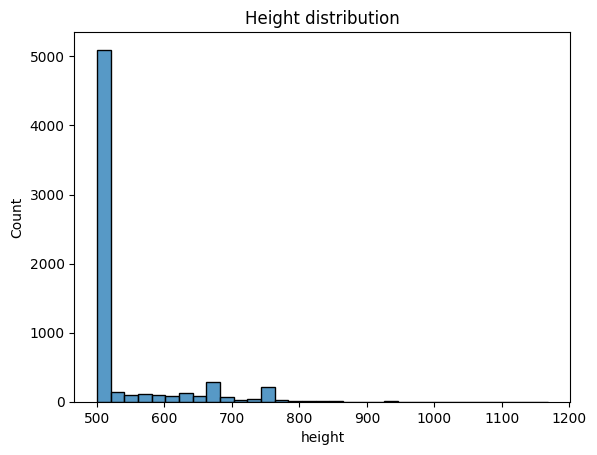

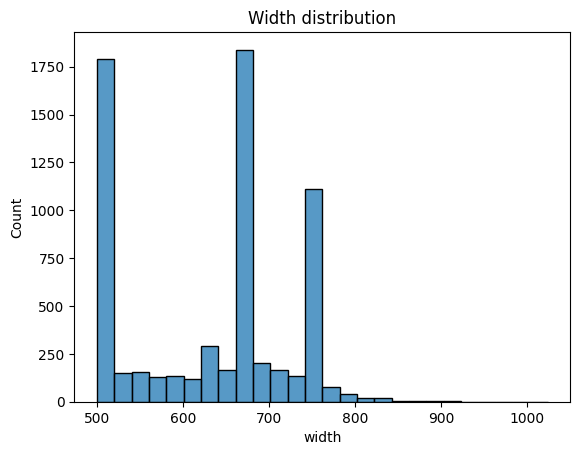

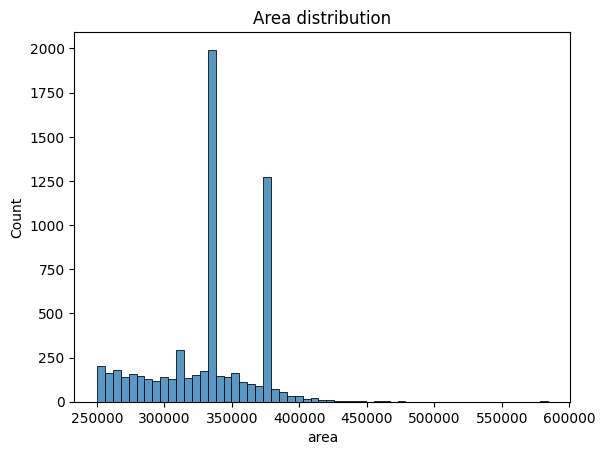

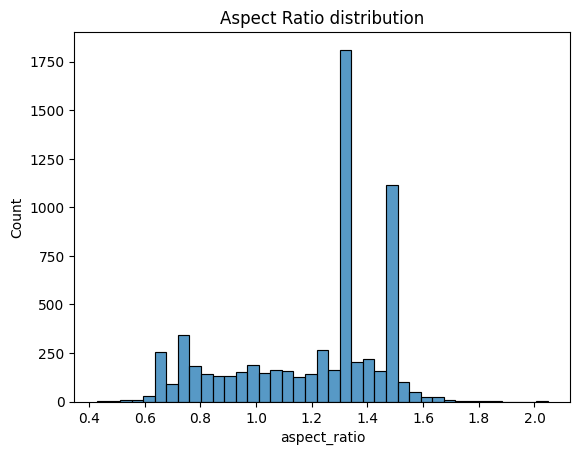

In [33]:
# Plot distributions for some image dimension features
_, ax = plt.subplots()
ax = sns.histplot(df["height"], binwidth=20)
ax.set_title("Height distribution");

_, ax = plt.subplots()
ax = sns.histplot(df["width"], binwidth=20)
ax.set_title("Width distribution");

_, ax = plt.subplots()
ax = sns.histplot(df["area"])
ax.set_title("Area distribution");

_, ax = plt.subplots()
ax = sns.histplot(df["aspect_ratio"])
ax.set_title("Aspect Ratio distribution");

## cat_to_name.json

In [44]:
# print some info on categories from provided json file
# NOTE: both key and value are strings
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

print(f"length of dictionary: {len(cat_to_name)}")

# verify that all categories are integers ranging from 1 to len(cat_to_name)
categories = list([int(category) for category in cat_to_name])
categories.sort()
# protecting against the possibility of categories: "01" and "1"
if len(categories) != len(set(categories)):
    print("WARNING: interestingly, the unique string categories are not unique when cast to an integer!")
if categories == list(range(1, len(cat_to_name)+1)):
    print(f"categories range from 1 to {len(cat_to_name)}")

# check that all values are unique
values = list(cat_to_name.values())
if len(values) == len(set(values)):
    print("all values are unique")

# print example entries
print("Some example entries:")
for n, (category, name) in enumerate(cat_to_name.items()):
    print(f"\t{category.ljust(4)}{name}")

    # break after printing 5
    if n == 4:
        break

length of dictionary: 102
categories range from 1 to 102
all values are unique
Some example entries:
	21  fire lily
	3   canterbury bells
	45  bolero deep blue
	1   pink primrose
	34  mexican aster
